# Ford GoBike Bikes Usage in 2019
## by Modhe Almelihi

## Investigation Overview
In this investigation, I wanted to look at Ford GoBike bikes usage in 2019, in general and based on user type.

## Dataset Overview
After a simple cleaning, the dataset contains 2,506,983 rows and 7 columns:
- duration_sec (int).
- start_time (datetime).
- end_time (datetime).
- start_station_name (object) - *446 unique stations*.
- end_station_name (object) - *446 unique stations*.
- bike_id (object) - *11,070 unique bikes*.
- user_type (category) - *Subscriber, and Customer*.

Also, new columns were created:
- *start_month*: to store the month number from *start_time*.
- *start_weekday*: to store week day number from *start_time*.
- *start_hour*: to store hour number from *start_time*.
- *end_hour*: to store hour number from *end_time*.
- *duration_minutes*: to store the duration in minutes. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2019-baywheels-tripdata.csv')

In [3]:
# labels to use in plots
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## Ford GoBike Bikes Usage in General

## Distribution of Duration 
Most rides took about (8-12) minutes. And very few rides lasted more than one hour (60 minutes).

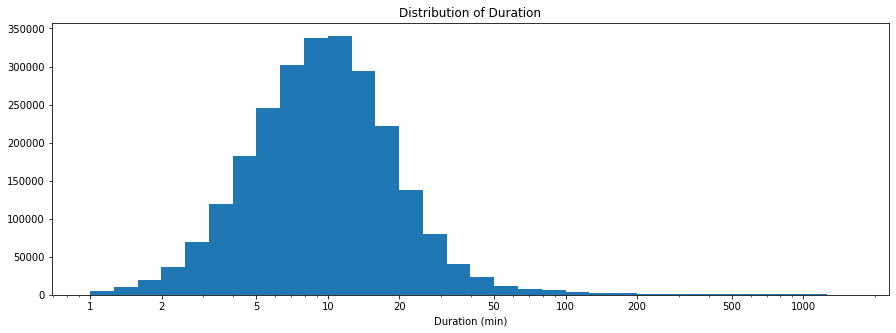

In [4]:
# plot a histogram with logarithmic scale transformation
plt.figure(figsize=[15,5])
bin_edges = 10 ** np.arange(0.0, np.log10(df.duration_minutes.max())+0.1, 0.1)
plt.hist(data = df, x = 'duration_minutes', bins = bin_edges)
plt.xscale('log')
tick_locs = [1,2,5,10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Duration (min)')
plt.title('Distribution of Duration');

## Bikes Usage Based on The Month
Most rides were in March and July, with about 250,000 rides for each. On the other hand, December had the lowest number of rides with about 150,000.

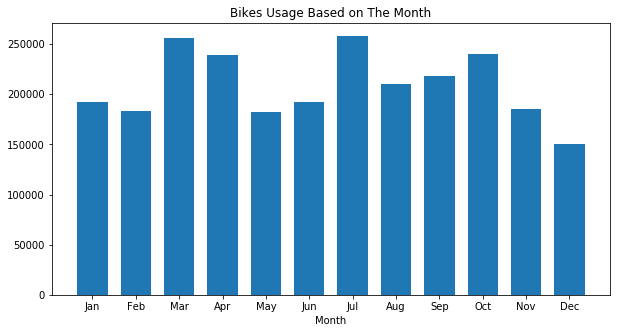

In [5]:
# plot a histogram with gaps between bars
plt.figure(figsize=[10,5])
bin_edges = np.arange(0.5, 12.5+1, 1)
plt.hist(data = df, x = 'start_month', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(1, 12+1, 1), month_labels)
plt.xlabel('Month')
plt.title('Bikes Usage Based on The Month');

## Bikes Usage Based on The Day of The Week
Bikes were mostly used on work days (Monday-Friday).

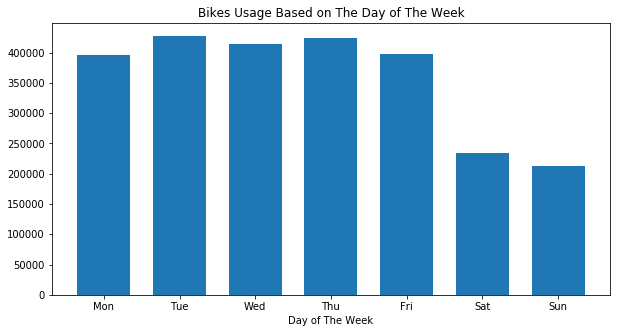

In [6]:
# plot a histogram with gaps between bars
plt.figure(figsize=[10,5])
bin_edges = np.arange(-0.5, 6.5+1, 1)
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.xlabel('Day of The Week')
plt.title('Bikes Usage Based on The Day of The Week');

## Bikes Usage Based on The Hour of The Day
The distribution is roughly bimodal (has two peaks) at 8 and 17. 

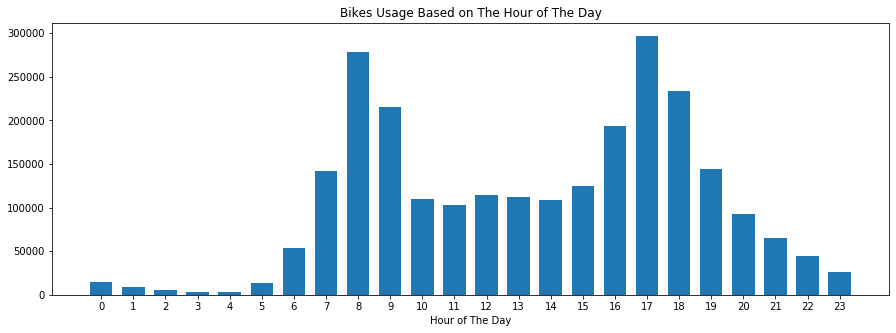

In [7]:
# plot a histogram with gaps between bars
plt.figure(figsize=[15,5])
bin_edges = np.arange(-0.5, 23.5+1, 1)
plt.hist(data = df, x = 'start_hour', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0, 23+1, 1))
plt.xlabel('Hour of The Day')
plt.title('Bikes Usage Based on The Hour of The Day');

## Average Duration Based on The Month 
### (For rides that lasted for an hour or less)
On average rides from June to October lasted longer than the other months.

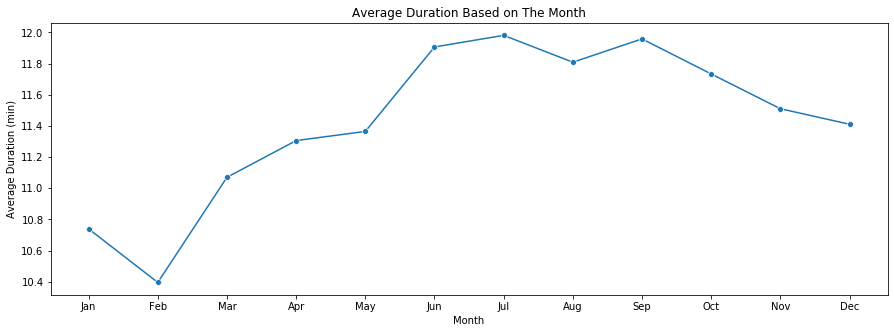

In [8]:
df_60_or_less = df[df.duration_minutes <= 60]

month_avg_mint = df_60_or_less.groupby('start_month').duration_minutes.mean()

# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(x=month_avg_mint.index, y=month_avg_mint, marker='o')
plt.xticks(np.arange(1,13), month_labels)
plt.ylabel('Average Duration (min)')
plt.xlabel('Month')
plt.title('Average Duration Based on The Month');

## Average Duration Based on The Day of The Week
### (For rides that lasted for an hour or less)
On average rides on the weekend (Saturday and Sunday) lasted longer than the other days.

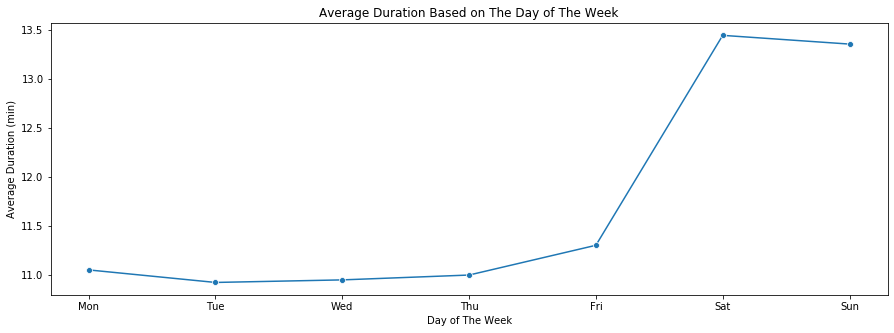

In [9]:
weekday_avg_mint = df_60_or_less.groupby('start_weekday').duration_minutes.mean()

# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(x=weekday_avg_mint.index, y=weekday_avg_mint, marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)');
plt.xlabel('Day of The Week')
plt.title('Average Duration Based on The Day of The Week');

## Ford GoBike Bikes Usage Based on User Type

## Ford GoBike Users in 2019
The majority of bike users were subscribers (80.6%).

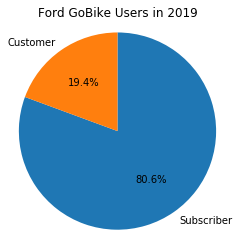

In [10]:
# plot a pie chart
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Ford GoBike Users in 2019');

## Distribution of Duration Based on User Type
Subscribers mostly rode bikes for (8-12) minutes, while customers mostly rode them for (10-19) minutes.<br>Also, customers rides were more likely to last more than one hour compared to subscribers. 

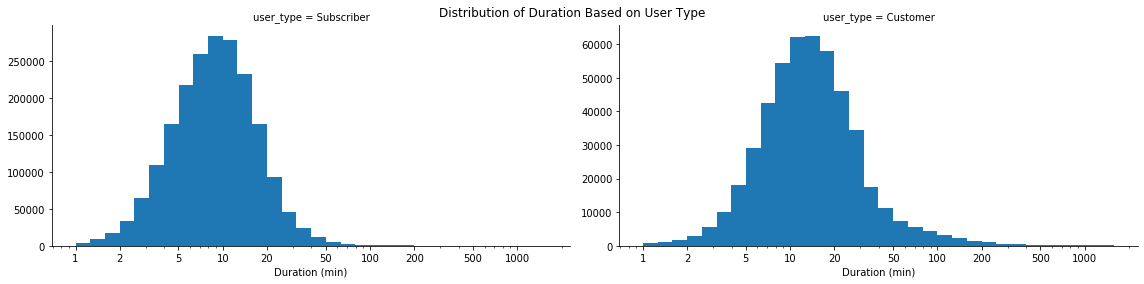

In [11]:
# facetting histograms of duration_minutes against user_type
user_cat_order = df['user_type'].value_counts().index
bin_edges = 10 ** np.arange(0.0, np.log10(df.duration_minutes.max())+0.1, 0.1)
g = sb.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
(g.map(plt.hist, "duration_minutes", bins = bin_edges)).set_axis_labels('Duration (min)')
plt.xscale('log')
tick_locs = [1,2,5,10, 20, 50, 100, 200, 500, 1000]
plt.xticks(tick_locs, tick_locs)
plt.suptitle('Distribution of Duration Based on User Type');

## Users Bikes Usage Based on The Month
Subscribers used bikes mostly in March and July, while customers mostly used them in December.

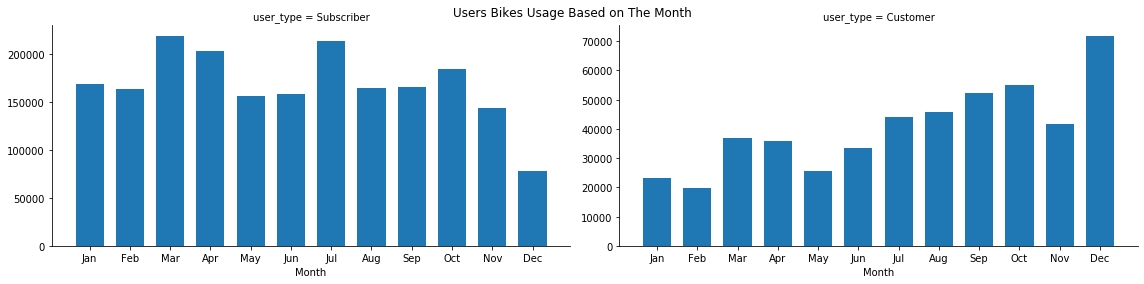

In [12]:
# facetting histograms of start_month against user_type
bin_edges = np.arange(0.5, 12.5+1, 1)
g = sb.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
(g.map(plt.hist, "start_month", bins = bin_edges, rwidth = 0.7)).set_axis_labels('Month')
plt.xticks(np.arange(1, 12+1, 1), month_labels)
plt.suptitle("Users Bikes Usage Based on The Month");

## Users Bikes Usage Based on The Day of The Week
Subscribers mostly used bikes on workdays (Monday - Friday), while customers bikes usage was about the same for the whole week with a slight increment on Friday and Saturday.

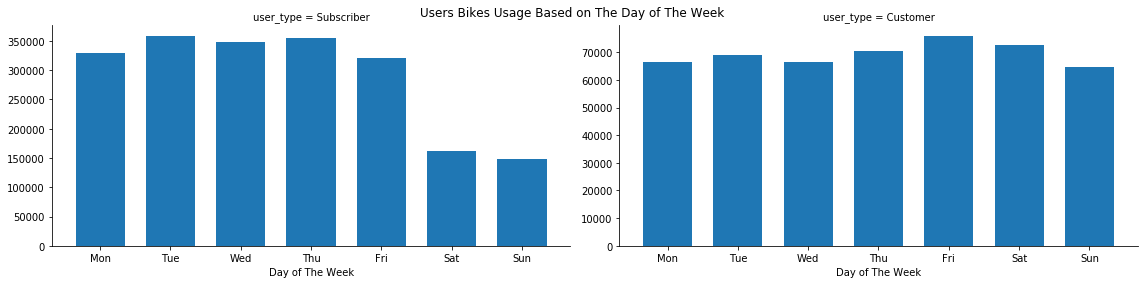

In [13]:
# facetting histograms of start_weekday against user_type
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
(g.map(plt.hist, 'start_weekday', bins = bin_edges, rwidth = 0.7)).set_axis_labels('Day of The Week')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels)
plt.suptitle("Users Bikes Usage Based on The Day of The Week");

## Users Bikes Usage Based on The Hour of The Day
Most rides for subscribers started at 8 or 17. While most customer rides started at 17 or 18.

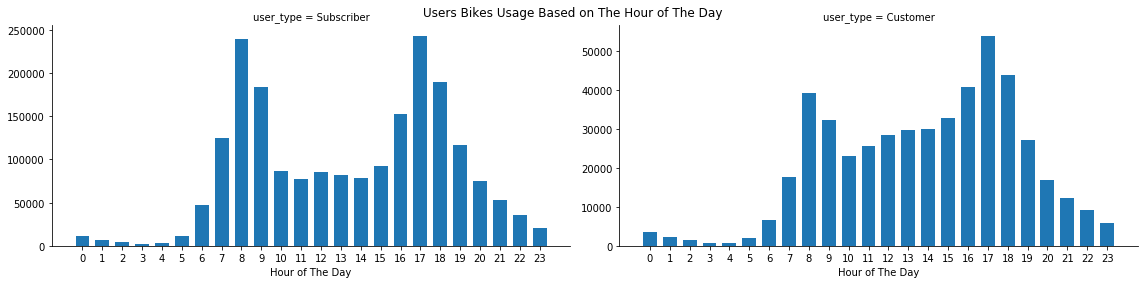

In [14]:
# facetting histograms of start_hour against user_type
bin_edges = np.arange(-0.5, 23.5+1, 1)
g = sb.FacetGrid(data = df, col = 'user_type', height=4, aspect=2, 
                 col_order = user_cat_order, sharey=False)
(g.map(plt.hist, 'start_hour', bins = bin_edges, rwidth = 0.7)).set_axis_labels('Hour of The Day')
plt.xticks(np.arange(0, 23+1, 1))
plt.suptitle("Users Bikes Usage Based on The Hour of The Day");

## Users Average Duration Based on The Month 
### (For rides that lasted for an hour or less)
On average customers rides lasted longer than subscribers rides in every month.

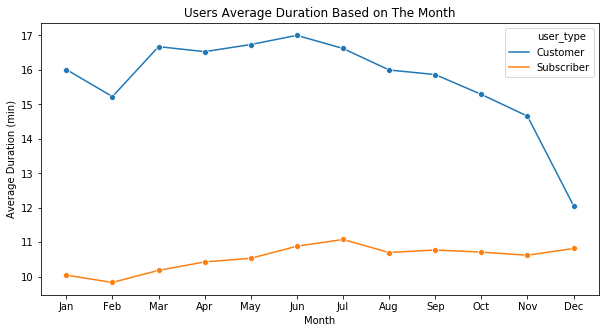

In [15]:
user_month_avg_mint = df_60_or_less.groupby(['user_type','start_month']).duration_minutes.mean()
user_month_avg_mint = user_month_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_month_avg_mint, x='start_month', y='duration_minutes', hue='user_type', marker='o')
plt.xticks(np.arange(1,13), month_labels)
plt.ylabel('Average Duration (min)')
plt.xlabel('Month')
plt.title('Users Average Duration Based on The Month');

## Users Average Duration Based on The Day of The Week
### (For rides that lasted for an hour or less)
On average customers rides lasted longer than subscribers rides on every day of the week.

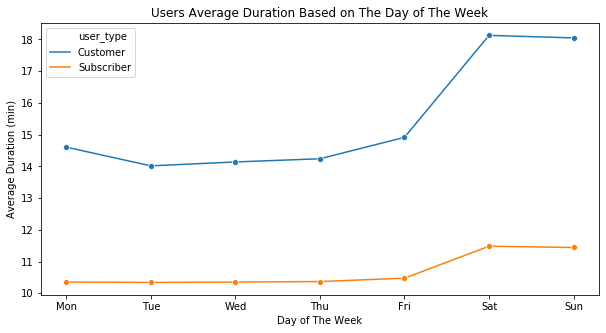

In [16]:
user_weekday_avg_mint = df_60_or_less.groupby(['user_type','start_weekday']).duration_minutes.mean()
user_weekday_avg_mint = user_weekday_avg_mint.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_weekday_avg_mint, x='start_weekday', y='duration_minutes', hue='user_type', marker='o')
plt.xticks(np.arange(0,7), weekday_labels)
plt.ylabel('Average Duration (min)')
plt.xlabel('Day of The Week')
plt.title('Users Average Duration Based on The Day of The Week');